In [24]:
import mglearn
import matplotlib.pyplot as plt
from mglearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


In [25]:
X, y = make_blobs(random_state=8, centers=4)
y %= 2

Text(0,0.5,'Feature 1')

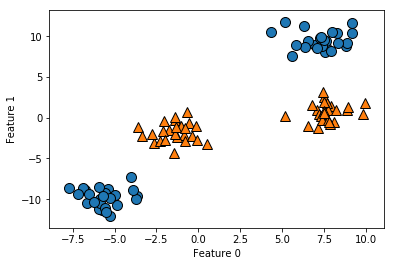

In [29]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [34]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

Text(0.5,1,'Linear SVM decision boundary')

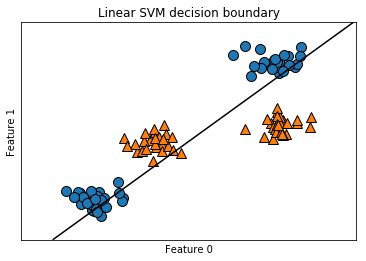

In [48]:
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Linear SVM decision boundary")

In [49]:
X[:3, :]

array([[-1.72161036, -1.48033142],
       [-3.6573384 , -9.5482383 ],
       [ 7.0778163 ,  0.99508772]])

In [45]:
import numpy as np
np.hstack([X, X[:, 1:]**2])[:3, 1:]

array([[-1.48033142,  2.19138111],
       [-9.5482383 , 91.16885455],
       [ 0.99508772,  0.99019957]])

现在我们对输入特征进行扩展，比如说添加第二个特征的平方（ feature1 \*\* 2 ）作
为一个新特征。现在我们将每个数据点表示为三维点  (feature0,  feature1,
feature1 \*\* 2) ，而不是二维点  (feature0, feature1)

In [103]:
X_new = np.hstack([X, X[:, 1:] ** 2])

In [52]:
from mpl_toolkits.mplot3d import axes3d, Axes3D


<Figure size 432x288 with 0 Axes>

Text(0.5,0,'feature1 ** 2')

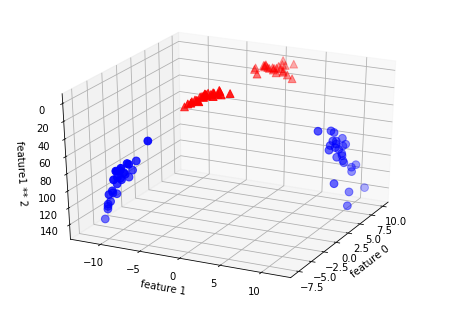

In [68]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],
           c='b',cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2],
           c='r', marker='^',cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature1 ** 2")

在数据的新表示中，现在可以用线性模型（三维空间中的平面）将这两个类别分开。
我们可以用线性模型拟合扩展后的数据来验证这一点

In [109]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# coef

In [100]:
linear_svm_3d.coef_

array([[ 0.11460935, -0.1934628 , -0.05682249]])

Text(0.5,0,'feature1 ** 2')

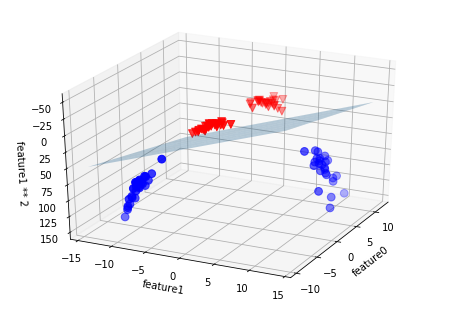

In [112]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / (-coef[2])

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],
           c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2],
           c='r', marker='v', cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [106]:
np.meshgrid(xx, yy)

[array([[-9.74064658, -9.29840934, -8.85617211, ..., 11.04450355,
         11.48674078, 11.92897802],
        [-9.74064658, -9.29840934, -8.85617211, ..., 11.04450355,
         11.48674078, 11.92897802],
        [-9.74064658, -9.29840934, -8.85617211, ..., 11.04450355,
         11.48674078, 11.92897802],
        ...,
        [-9.74064658, -9.29840934, -8.85617211, ..., 11.04450355,
         11.48674078, 11.92897802],
        [-9.74064658, -9.29840934, -8.85617211, ..., 11.04450355,
         11.48674078, 11.92897802],
        [-9.74064658, -9.29840934, -8.85617211, ..., 11.04450355,
         11.48674078, 11.92897802]]),
 array([[-14.11880698, -14.11880698, -14.11880698, ..., -14.11880698,
         -14.11880698, -14.11880698],
        [-13.54943035, -13.54943035, -13.54943035, ..., -13.54943035,
         -13.54943035, -13.54943035],
        [-12.98005373, -12.98005373, -12.98005373, ..., -12.98005373,
         -12.98005373, -12.98005373],
        ...,
        [ 12.64189431,  12.64189431,

Text(0,0.5,'Feature 1')

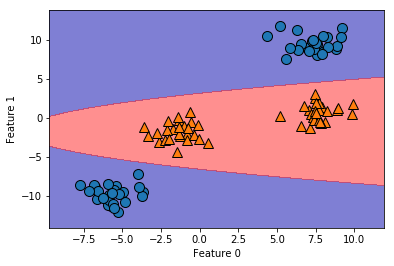

In [115]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")